# Задание 1
## Вариант 10
N = 9 
L = 2 

In [16]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

dpi = 1000
def sum(func, nu, k_l, k_u, real_part):
    res = 0
    for k in range(k_u - k_l):
        if real_part:
            res += func(k + k_l) * np.cos(-2*np.pi*(k + k_l)*nu)
        else:
            res += func(k + k_l) * np.sin(-2*np.pi*(k + k_l)*nu)
    return res

def get_transform(func, nu_l, nu_u, real_part, k_l, k_u):
    step = (nu_u - nu_l) / dpi
    nu = nu_l
    res = np.array([])
    for step_num in range(dpi):
        nu += step
        res = np.append(res, sum(func, nu, k_l, k_u, real_part))
    return res

#Принимает функцию от k. Cуммирует ее от k_l до k_u 
def DTFT(func, nu_l, nu_u, k_l=-1000, k_u=1000, res_type='abs'):
    if res_type == 'abs':
        Re = np.array(get_transform(func, nu_l, nu_u, True, k_l, k_u))
        Im = np.array(get_transform(func, nu_l, nu_u, False, k_l, k_u))
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array(get_transform(func, nu_l, nu_u, True, k_l, k_u))
        return Re
    elif res_type=="Im":
        Im=np.array(get_transform(func, nu_l, nu_u, False, k_l, k_u))
        return Im 

## Номер 1.1
X(0) = 8

Ширина главного лепестка: $\Delta \nu = 0.12$ 

Точки скачков фазы на $\pi$: $ \nu = 0.12 * k; k \neq 0$

Пилообразный график получается из-за того, что функция состоит из отсчетов, а Фурье-образ отсчета это $e^{-j2 \pi \nu}$. Таким образом в силу линейности ДВПФ образ функции отсчетов представляется как сумма мнимых экспонент, умноженных на дельа-функции. Общий вид ДВПФ:

$$ X(\nu) =  \frac{sin(N \pi \nu)}{sin(\pi \nu)} * e^{- j (N - 1) \pi \nu}$$

$$ |X(\nu)| =  |\frac{sin(N \pi \nu)}{sin(\pi \nu)}|$$

Фаза скачет на $\pi$, посколку в этих точках отношение синусов меняет знак. 

Экстремумы модуля ДВПФ
Экстремум: ( -0.4365936593659366 , 1.019911536786974 )
Экстремум: ( -0.3750875087508751 , 3.7419676299125553e-13 )
Экстремум: ( -0.30918091809180914 , 1.2069845186915014 )
Экстремум: ( -0.25007500750075007 , 9.781786543664954e-13 )
Экстремум: ( -0.17976797679767975 , 1.8332524544521254 )
Экстремум: ( -0.12506250625062504 , 2.712075392508542e-12 )
Экстремум: ( -5.0005000500008556e-05 , 8.0 )
Экстремум: ( 0.12496249624962497 , 2.378163299784604e-12 )
Экстремум: ( 0.17966796679667973 , 1.8332524544521216 )
Экстремум: ( 0.24997499749975005 , 1.7757636627643046e-12 )
Экстремум: ( 0.3090809080908091 , 1.2069845186914998 )
Экстремум: ( 0.374987498749875 , 1.7344943676585517e-12 )
Экстремум: ( 0.4364936493649365 , 1.019911536786976 )
Экстремумы фазы
Экстремум: ( -0.3750875087508751 , -1.1773973916987133 )
Экстремум: ( -0.37498749874987497 , 1.961296293636701 )
Экстремум: ( -0.25007500750075007 , -0.7849054501011514 )
Экстремум: ( -0.24997499749974994 , 2.353995375335456 

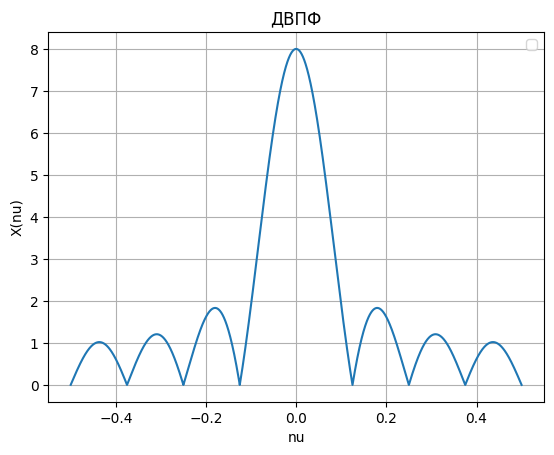

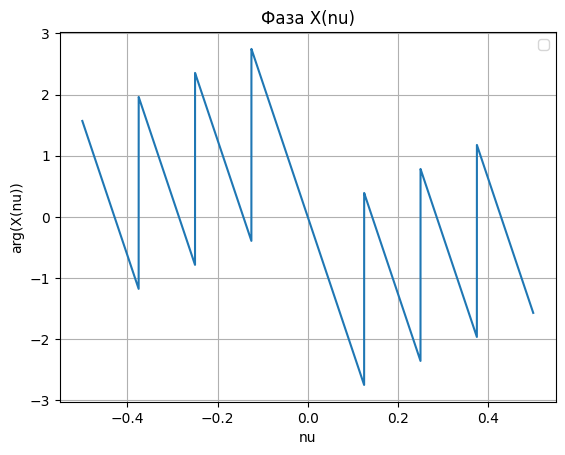

In [2]:
import Plot

def one_func(k):
    return 1

# data[:, 0] = x
# data[:, 1] = y
def print_extremums(x_arr, y_arr):
    diriv_sign = y_arr[1] - y_arr[0]
    for i in range(np.size(x_arr) - 1):
        new_diriv_sign = y_arr[i + 1] - y_arr[i]
        if diriv_sign * new_diriv_sign < 0:
            print('Экстремум: (', x_arr[i], ',', y_arr[i], ')')
        diriv_sign = new_diriv_sign


def print_func(func, k_l = -10, k_r = 10):
    
    data_x = np.linspace(k_l, k_r, (k_r - k_l) + 1)
    data_y = np.array([])
    real_data_x = np.array([])
    for it in data_x:
        data_y = np.append(data_y, 0)
        data_y = np.append(data_y, func(it))
        data_y = np.append(data_y, 0)
        real_data_x = np.append(real_data_x, it)
        real_data_x = np.append(real_data_x, it)
        real_data_x = np.append(real_data_x, it)
    
    plot_func = Plot.PlotFunction()
    plot_func.set_arrayX(real_data_x)
    plot_func.set_arrayY(data_y)

    plot = Plot.MyPlot()
    plot.add_function(plot_func)
    plot.add_dots(plot_func)
    plot.config_plot('График функции', 'k', 'X(k)')
    plot.draw_all()

    Plot.MyPlot.show_all()

def draw_graph(d_func, k_l = -100, k_u = 100):
    func = Plot.PlotFunction()
    nu_l = -0.5
    nu_u = 0.5
    arrayX = np.linspace(nu_l, nu_u, dpi)
    func.set_arrayX(arrayX)
    func.set_arrayY(DTFT(d_func, nu_l, nu_u, k_l, k_u))

    print('Экстремумы модуля ДВПФ')
    print_extremums(func.arrayX, func.arrayY)

    phase = Plot.PlotFunction()
    phase.set_arrayX(arrayX)
    phase.set_arrayY(np.angle(DTFT(d_func, nu_l, nu_u, k_l, k_u, 'Re') + 1j*DTFT(d_func, nu_l, nu_u, k_l, k_u, 'Im')))

    print('Экстремумы фазы')
    print_extremums(phase.arrayX, phase.arrayY)

    plot_func = Plot.MyPlot()
    plot_func.add_function(func)
    plot_func.config_plot('ДВПФ', 'nu', 'X(nu)')
    plot_func.draw_all()

    plot_phase = Plot.MyPlot()
    plot_phase.add_function(phase)
    plot_phase.config_plot('Фаза X(nu)', 'nu', 'arg(X(nu))')
    plot_phase.draw_all()

    Plot.MyPlot.show_all()

draw_graph(one_func, 0, 8)

## Номер 1.2

Практический результат совпал с теорией. На график виден еще один высокий пик. Между ними есть меньшие пики. Их количество зависит от N(каждый N-ый пик высокий) 


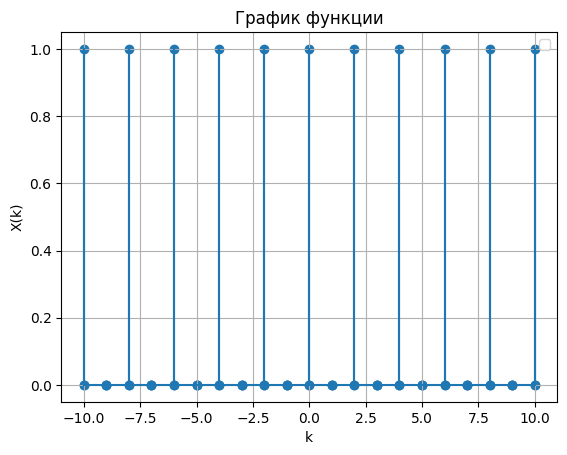

Экстремумы модуля ДВПФ
Экстремум: ( -0.4375937593759376 , 9.045455683371184e-13 )
Экстремум: ( -0.4101910191019102 , 1.8332523124707167 )
Экстремум: ( -0.3750875087508751 , 9.756884370090204e-13 )
Экстремум: ( -0.34548454845484544 , 1.2069813501560454 )
Экстремум: ( -0.3125812581258126 , 1.1227630062995406e-12 )
Экстремум: ( -0.2818781878187819 , 1.0199087106256401 )
Экстремум: ( -0.25007500750075007 , 1.3855125652223868e-12 )
Экстремум: ( -0.21827182718271826 , 1.0199087106256486 )
Экстремум: ( -0.18756875687568758 , 1.872412068146174e-12 )
Экстремум: ( -0.15466546654665464 , 1.2069813501560396 )
Экстремум: ( -0.12506250625062504 , 2.9354558306840537e-12 )
Экстремум: ( -0.08995899589958994 , 1.8332523124707116 )
Экстремум: ( -0.06255625562556255 , 5.189100169917858e-12 )
Экстремум: ( -5.0005000500008556e-05 , 8.0 )
Экстремум: ( 0.06245624562456242 , 4.9907119835078185e-12 )
Экстремум: ( 0.08985898589858987 , 1.8332523124707205 )
Экстремум: ( 0.12496249624962497 , 2.575097711758352e-12

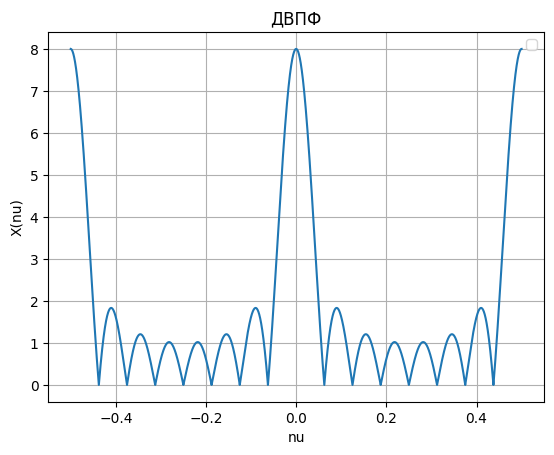

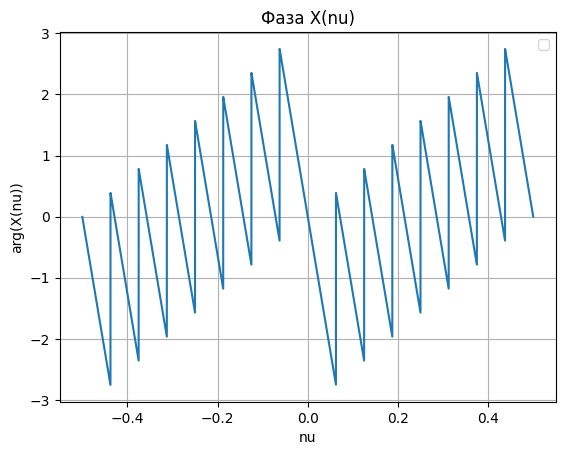

In [4]:
L = 2
# В функцию надо засунать проверу на k. В интеграл к подается чтобы не пробегать зря нулевые значения
def X_L(k):
    if ((k % L) == 0):
        return 1
    return 0

print_func(X_L)
draw_graph(X_L, 0, 16)

## Номер 1.3
При умножении исходного сигнала на k его Фурье-образ изменяется как:

$$ k x[k] <-> \frac{j}{2 \pi} \frac{d X(\nu)}{d \nu} $$

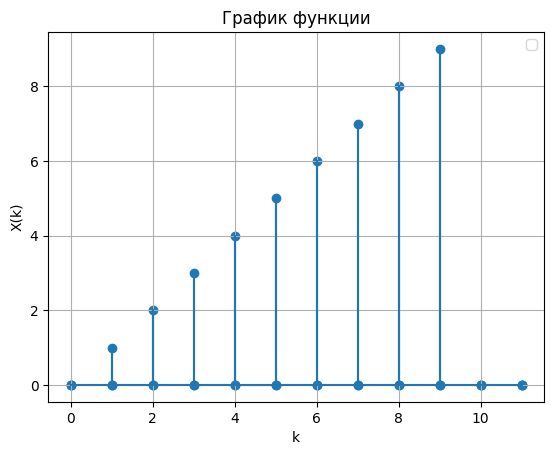

Экстремумы модуля ДВПФ
Экстремум: ( -0.4495949594959496 , 4.556670502824985 )
Экстремум: ( -0.3874887488748875 , 5.325301679839269 )
Экстремум: ( -0.3484848484848485 , 5.057110077427737 )
Экстремум: ( -0.27447744774477445 , 6.556037198391525 )
Экстремум: ( -0.24687468746874686 , 6.396461143278769 )
Экстремум: ( -0.15966596659665966 , 10.195578772602094 )
Экстремум: ( -0.14356435643564353 , 10.113561193864427 )
Экстремум: ( -5.0005000500008556e-05 , 45.0 )
Экстремум: ( 0.14346434643464345 , 10.113561193864433 )
Экстремум: ( 0.15956595659565964 , 10.195578772602094 )
Экстремум: ( 0.24677467746774684 , 6.396461143278764 )
Экстремум: ( 0.27437743774377443 , 6.556037198391524 )
Экстремум: ( 0.3483848384838484 , 5.057110077427748 )
Экстремум: ( 0.3873887388738875 , 5.3253016798392485 )
Экстремум: ( 0.4494949494949495 , 4.5566705028249785 )
Экстремумы фазы
Экстремум: ( -0.3945894589458946 , -3.1378290215049254 )
Экстремум: ( -0.39448944894489446 , 3.139719458537414 )
Экстремум: ( -0.288878887

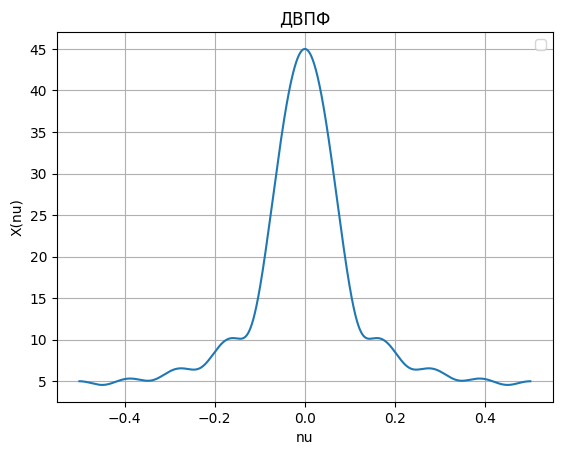

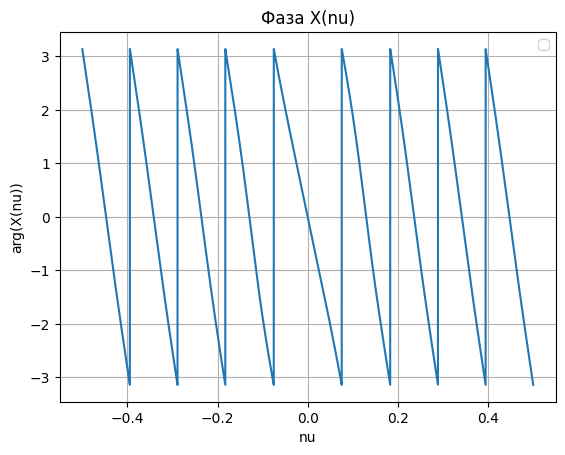

In [4]:
N = 10
def X_D(k):
    if k < 0 or k > (N - 1):
        return 0
    return k

print_func(X_D, 0, 11)
draw_graph(X_D)

## Номер 1.4
По теореме смещения:

$$ k[k] e^{j 2 \pi \nu _0 k} <-> X(\nu - \nu _0) $$ 

Таким образом функция спектральной плотности будет аналогична Фурье образу $x_N[k]$, но со смещением на -0.1:

$$ |X(\nu)| =  |\frac{sin(N \pi \nu)}{sin(\pi \nu)}|$$

/home/uwu/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/uwu/.local/lib/python3.8/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


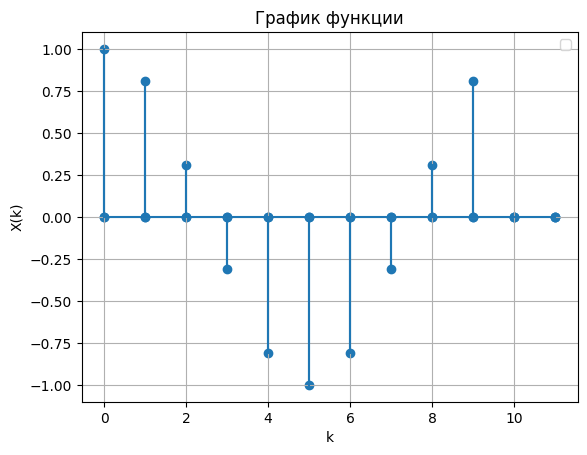

Экстремумы модуля ДВПФ
Экстремум: ( -0.4484948494849485 , 1.1238011038064288 )
Экстремум: ( -0.4000900090009001 , 4.2804412588008384e-13 )
Экстремум: ( -0.3468846884688469 , 1.4214346287548794 )
Экстремум: ( -0.30008000800080004 , 1.1773392287313005e-12 )
Экстремум: ( -0.24357435743574357 , 2.2474576875639696 )
Экстремум: ( -0.20007000700070005 , 3.3588422114437896e-12 )
Экстремум: ( -0.10006000600060005 , 10.0 )
Экстремум: ( -5.0005000500008556e-05 , 3.9400613298499995e-12 )
Экстремум: ( 0.04345434543454352 , 2.2474576875639665 )
Экстремум: ( 0.09995999599959993 , 1.9745799942816845e-12 )
Экстремум: ( 0.1467646764676468 , 1.4214346287548814 )
Экстремум: ( 0.19996999699969997 , 1.7257939968823695e-12 )
Экстремум: ( 0.24837483748374845 , 1.1238011038064322 )
Экстремум: ( 0.2999799979998 , 1.8333345466998535e-12 )
Экстремум: ( 0.34948494849484957 , 1.012593392414567 )
Экстремум: ( 0.39998999899990006 , 2.0864421301780567e-12 )
Экстремум: ( 0.45049504950495056 , 1.0125933924145665 )
Экстр

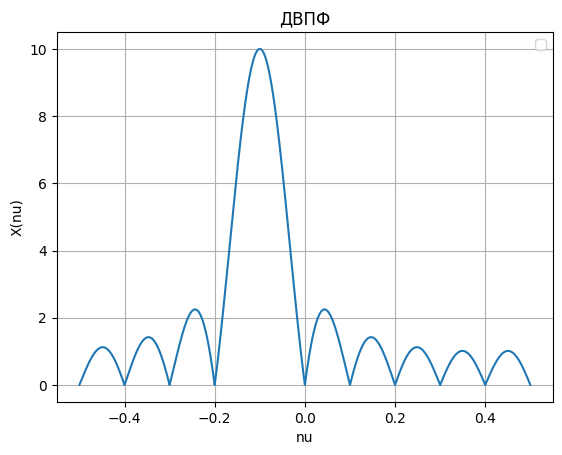

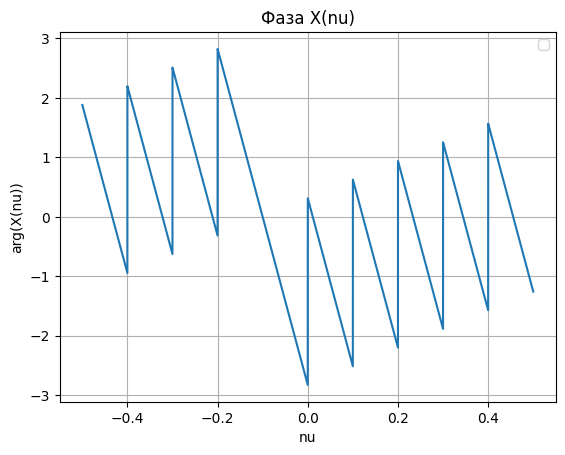

In [5]:
def X_N(k):
    if k < 0 or k > (N - 1):
        return 0
    return 1

nu_0 = -0.1

def X_S(k):
    return X_N(k) * np.exp( 1j * 2 * np.pi * k * nu_0)

print_func(X_S, 0, 11)
draw_graph(X_S)

## Номер 1.5

Необходимо построить линейную дискретную свертку во временной области последовательности 

$$
x_N [k] = \sum ^{N - 1} _ {m = 0} 1 [k - m]
$$

с собой же:

$$ 
\sum ^{\infty} _{m = - \infty} x[m] y[k - m] <-> X(\nu) Y(\nu)
$$

таким образом преобразование Фурье для свертки будет иметь формулу:

$$\overline{X}(\nu) = X(\nu) \cdot X(\nu) = \frac{\sin^2 N \pi \nu}{\sin^2 \pi \nu} e^{-2j (N-1) \pi \nu}$$

Значение ДВПФ в точке 0:

$$|\overline{X}(0)| = N^2$$

Ширина главного лепестка вычисляется аналогично пункту 1.1. 
$$\Delta \nu = \frac{2}{N}$$

Вычислим энергию $x \Delta t$

$$\int_{-\frac{1}{2}}^{\frac{1}{2}} |\overline{X}(\nu)|^2 d \nu$$

воспользуемся формулой для косинуса двойного угла

$$\int_{-\frac{1}{2}}^{\frac{1}{2}} |\overline{X}(\nu)|^2 d \nu = \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{(1 - \cos 2 \pi \nu N)^2}{(1 - \cos 2 \pi \nu)^2} d \nu$$


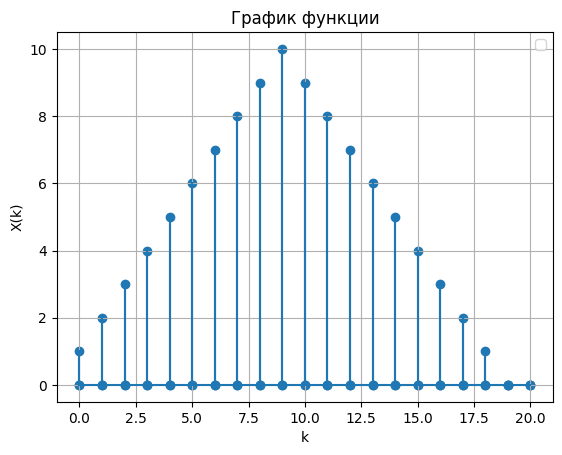

Экстремумы модуля ДВПФ
Экстремум: ( -0.4495949594959496 , 1.0253453783616568 )
Экстремум: ( -0.4000900090009001 , 5.674488790800843e-14 )
Экстремум: ( -0.3484848484848485 , 1.2629289209164998 )
Экстремум: ( -0.30008000800080004 , 3.934029504696319e-14 )
Экстремум: ( -0.24687468746874686 , 2.0204764038235252 )
Экстремум: ( -0.20007000700070005 , 1.7805499213370518e-14 )
Экстремум: ( -0.14356435643564353 , 5.051066057390399 )
Экстремум: ( -0.10006000600060005 , 1.3212703531941982e-14 )
Экстремум: ( -5.0005000500008556e-05 , 100.0 )
Экстремум: ( 0.09995999599959993 , 1.4564670535051168e-14 )
Экстремум: ( 0.14346434643464345 , 5.051066057390396 )
Экстремум: ( 0.19996999699969997 , 5.809342097129968e-15 )
Экстремум: ( 0.24677467746774684 , 2.0204764038235297 )
Экстремум: ( 0.2999799979998 , 3.926251574169253e-14 )
Экстремум: ( 0.3483848384838484 , 1.262928920916529 )
Экстремум: ( 0.39998999899990006 , 2.3891473263187903e-14 )
Экстремум: ( 0.4494949494949495 , 1.0253453783616484 )
Экстремумы

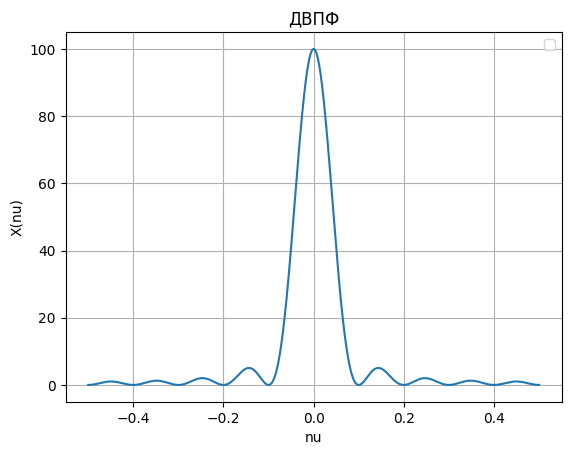

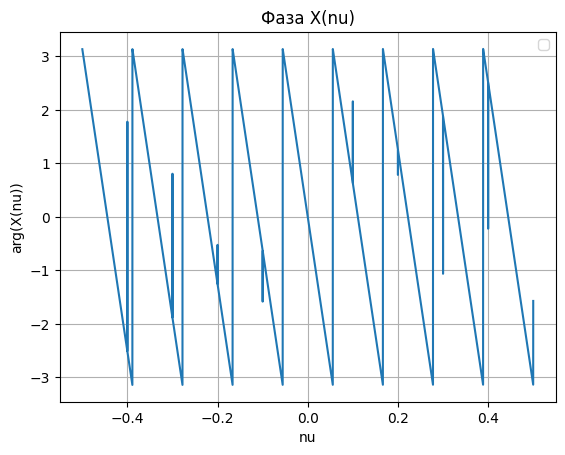

In [6]:
class Conv:
  result = np.array([])

  def X_conv(k):
    M = 2 * N
    res = 0
    for m in range(-M, M):
      res += X_N(m) * X_N(k - m)
    return res

  def convolution():
    size = 30
    res = np.full((size), 0.0)
    for i in range(size):
      res[i] = Conv.X_conv(i)
    return res

  def conv_func(k):
    if k < 0:
      return 0
    return Conv.result[k]

Conv.result = Conv.convolution()
print_func(Conv.X_conv, 0, 20)
draw_graph(Conv.X_conv)


# Задание 2

Последовательноть для 10 варианта $ x[k] = {1; -6; 8; -4; 0; -7; 4; -9} $

## Номер 2.1

а) вычислить ДПФ в матричной форме

Значения отсчетов преобразвания x [-13.        +0.00000000e+00j  -1.82842712-8.24264069e+00j
 -11.        -1.46957616e-15j   3.82842712-2.42640687e-01j
  39.        +3.18408168e-15j   3.82842712+2.42640687e-01j
 -11.        -1.46957616e-15j  -1.82842712+8.24264069e+00j]


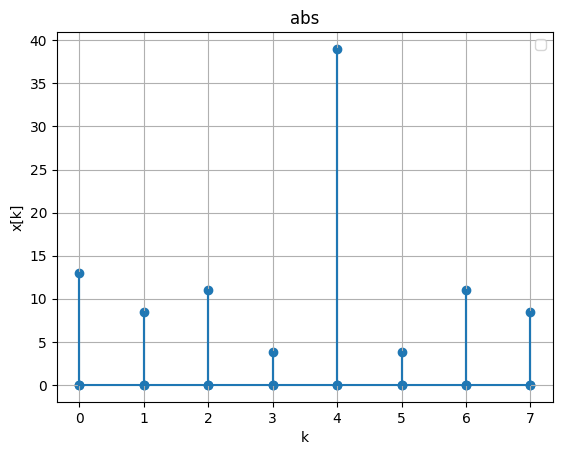

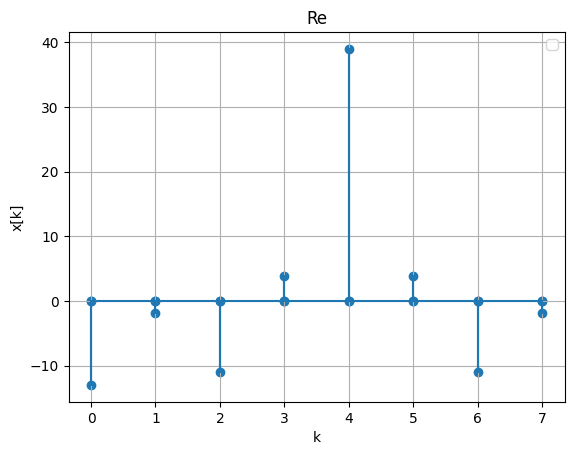

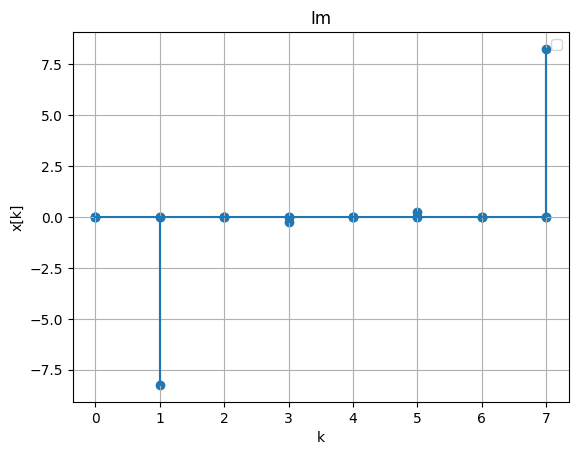

In [39]:
import numpy as np
import scipy as sci
import Plot

from scipy.fft import fft

def full_W(N):
    W = np.full((N, N), 0.0 + 0.0j)
    for k in range(N):
        for n in range(N):
            W[n, k] = np.exp(-2j * np.pi / N * ((n * k) % N))
    return W

#построение отсчетов
def draw_arr(x, type='abs'):
    size = np.size(x)
    x_arr = np.array([])
    y_arr = np.array([])
    for i in range(size):
        x_arr = np.append(x_arr, i)
        x_arr = np.append(x_arr, i)
        x_arr = np.append(x_arr, i)
        y_arr = np.append(y_arr, 0)
        if type == 'abs':
            y_arr = np.append(y_arr, np.abs(x[i]))
        if type == 'Re':
            y_arr = np.append(y_arr, x[i].real)
        if type == 'Im':
            y_arr = np.append(y_arr, x[i].imag)
        y_arr = np.append(y_arr, 0)

    func = Plot.PlotFunction()
    func.set_arrayX(x_arr)
    func.set_arrayY(y_arr)
    
    plot = Plot.MyPlot()
    plot.config_plot(type, 'k', 'x[k]')
    plot.add_dots(func)
    plot.add_function(func)
    plot.draw_all()    

def matr_DFT(x):
    N = np.size(x)
    W = full_W(N)
    X = np.matmul(W, x)
    return X

x = np.array([1, -6, 8, -4, 0, -7, 4, -9])
X = matr_DFT(np.transpose(x))
print('Значения отсчетов преобразвания x', X)
draw_arr(X)
draw_arr(X, 'Re')
draw_arr(X, 'Im')



б) через быстрое преобразование Фурье

Последовательость отсчетов быстрого преобразования Фурье [-13.        -0.j          -1.82842712-8.24264069j
 -11.        -0.j           3.82842712-0.24264069j
  39.        -0.j           3.82842712+0.24264069j
 -11.        +0.j          -1.82842712+8.24264069j]
Разница алгоритмов
[ 0.00000000e+00+0.00000000e+00j  1.33226763e-15-1.77635684e-15j
  1.77635684e-15-1.46957616e-15j  8.88178420e-16-8.88178420e-16j
  0.00000000e+00+3.18408168e-15j -4.44089210e-16+0.00000000e+00j
  1.77635684e-15-1.46957616e-15j  0.00000000e+00+0.00000000e+00j]


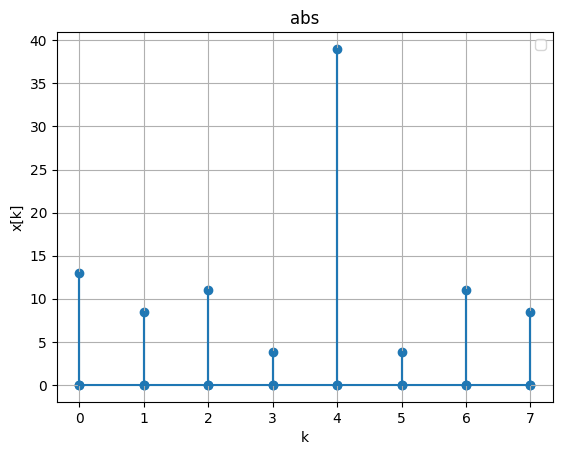

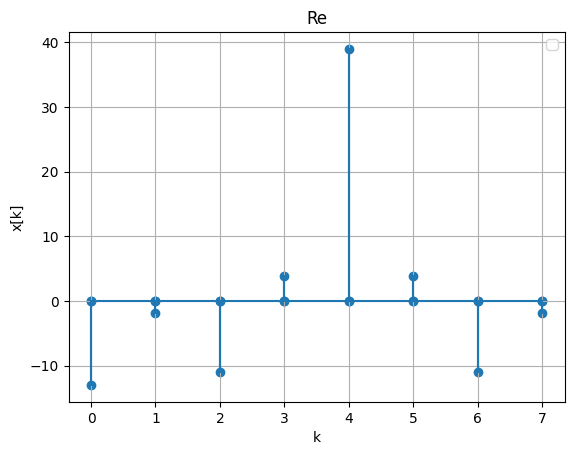

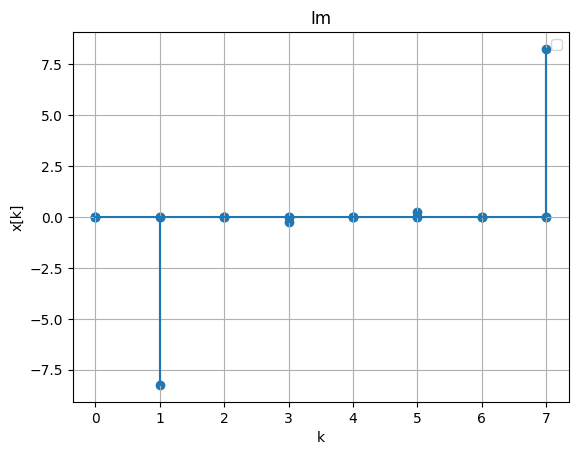

In [40]:
my_X = X
X = fft(x)
print('Последовательость отсчетов быстрого преобразования Фурье', X)
draw_arr(X)
draw_arr(X, 'Re')
draw_arr(X, 'Im')

print('Разница алгоритмов')
print(my_X - X)

## Номер 2.2
Получившиеся преобразования сходятся с БПФ с точностью $10^{-14}$

##  Номер 2.3

Последовательость $x[k]$:

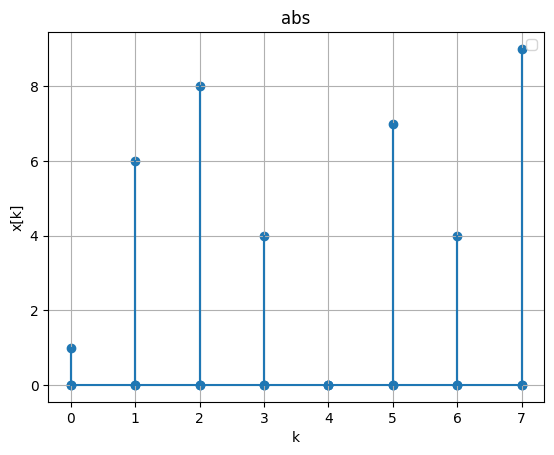

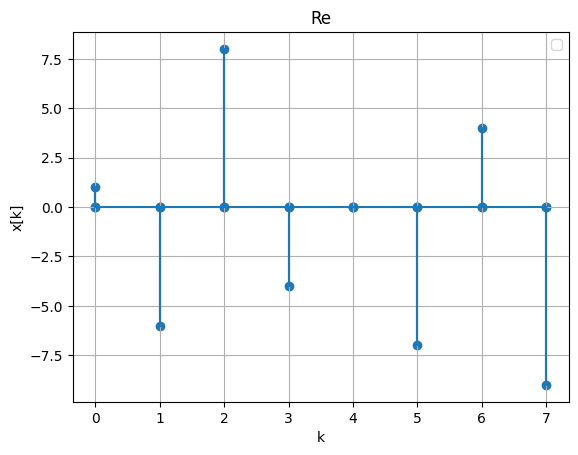

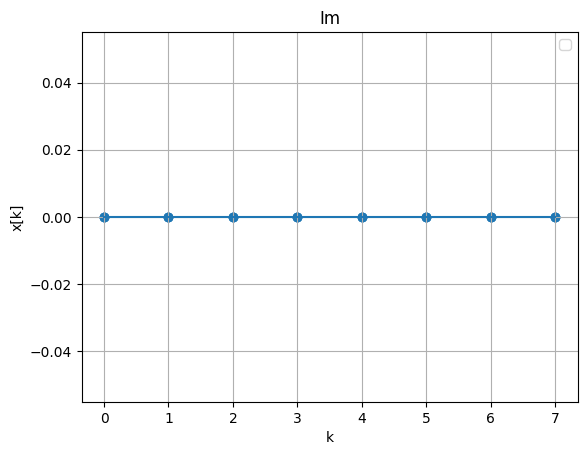

In [ ]:
draw_arr(x)
draw_arr(x, 'Re')
draw_arr(x, 'Im')

$$ Y[n] = e^{-j 2 \pi \frac{-3}{8}n} X[n] $$

По теореме запаздывания начальная сигнал во временной области должен сместиться на $-m$
Таким образом 
$$ y[k] = x[k + 3] $$

# Задание 3

## Номре 3.1

В данном случае строились графики модуля ДВПФ и ДПФ без добавления дополниткеьных нулей


/tmp/ipykernel_14281/1659046371.py:24: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, x_k, 'b', 'bo')
/tmp/ipykernel_14281/1659046371.py:42: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(n/N, abs(fft(x_k)), 'b', 'bo')


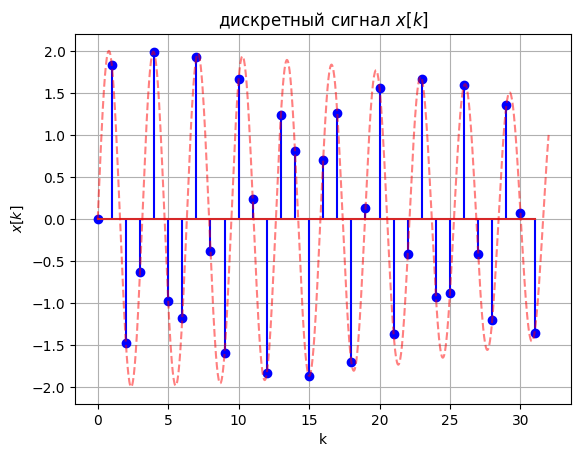

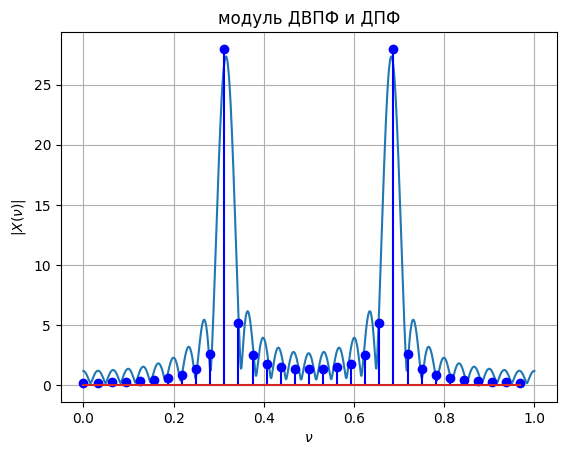

In [35]:
from scipy.fft import fft, ifft
import math

N = 32
m0 = 10
m1 = 0.85

k = np.array(range(N))
n = np.array(range(N))
x_k = np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)

def func(k):
  return np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)


def draw_DFT_and_DTFT():
  
  #Дискретное ао времени преобразование 
  nu_range = np.linspace(0, 1, 1000)
  X_abs_range = DTFT(func, 0, 1, 0, N -1)

  plt.figure()

  plt.stem(k, x_k, 'b', 'bo')
  plt.title(r'дискретный сигнал $x[k]$')
  plt.xlabel('k') 
  plt.ylabel(r'$x[k]$') 

  k_range = np.linspace(0, N, 1000)
  x_k_range = np.sin(2*math.pi / N * m0 * k_range) + np.sin(2*math.pi / N * (m0+0.25) * k_range)
  plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')

  plt.grid()

  plt.figure()

  plt.plot(nu_range, X_abs_range)
  plt.title(r'модуль ДВПФ и ДПФ')
  plt.ylabel(r'$|X(\nu)|$')
  plt.xlabel(r'$\nu$')

  plt.stem(n/N, abs(fft(x_k)), 'b', 'bo')
  plt.grid()

draw_DFT_and_DTFT()

В данном случае добавлялись дополнительные нулевые отсчеты

/tmp/ipykernel_14281/2885923605.py:21: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.array(range(N+M)), x_k, 'b', 'bo')
/tmp/ipykernel_14281/2885923605.py:39: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.array(range(M+N))/(N+M), abs(fft(x_k)), 'b', 'bo')


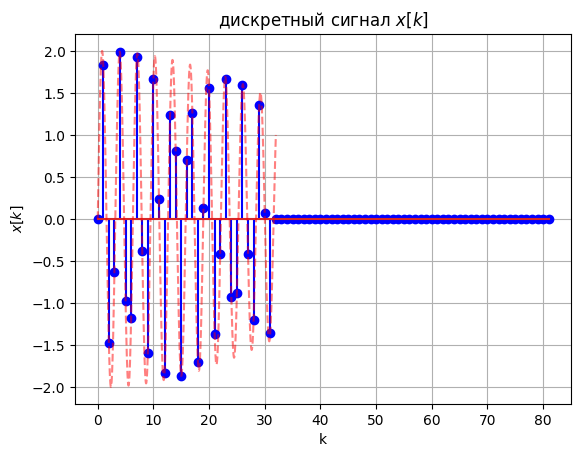

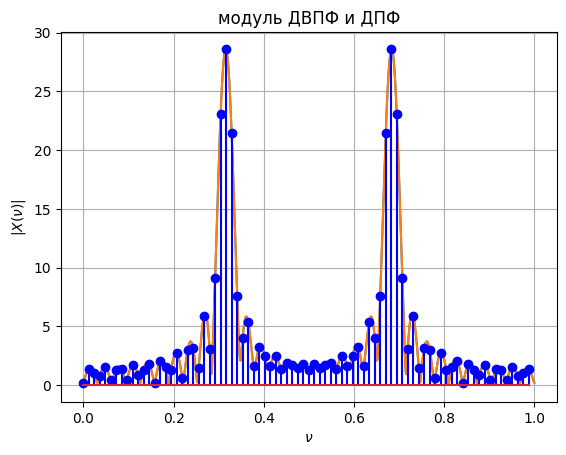

In [38]:
# расширим дискретный сигнал нулевыми отсчетами
M = 50
x_k = np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)
x_k = np.concatenate((x_k, np.zeros(M)), None)

def func(k):
  return np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)


def wided_func(k):
    if k > N -1:
        return 0
    return func(k)    

# ДВПФ для заданной последовательности (функция от nu)
nu_range = np.linspace(0, 1, 1000)
X_abs_range = DTFT(func, 0, 1, 0, N)

plt.figure()

plt.stem(np.array(range(N+M)), x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 

k_range = np.linspace(0, N, 1000)
x_k_range = np.sin(2*math.pi / N * m0 * k_range) + np.sin(2*math.pi / N * (m0+0.25) * k_range)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
plt.grid()

plt.figure()

plt.plot(nu_range, X_abs_range)
plt.plot(nu_range, X_abs_range)
plt.title(r'модуль ДВПФ и ДПФ')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')

plt.stem(np.array(range(M+N))/(N+M), abs(fft(x_k)), 'b', 'bo')
plt.grid()

## Задание 3.2
Построим график сигнала:
$$x[k] = \cos \left(\frac{2 \pi}{N} m k \right) + \sin \left(\frac{2 \pi}{N} m k \right)$$

/tmp/ipykernel_14281/1147823218.py:13: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, x_k, 'b', 'bo')


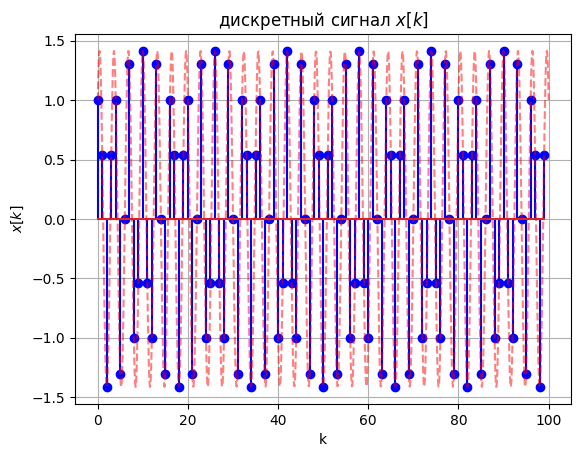

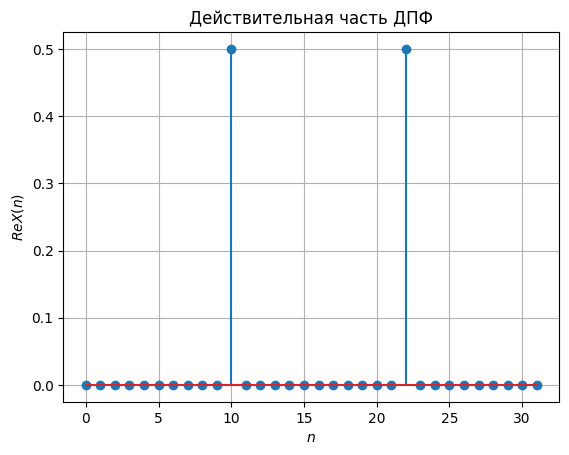

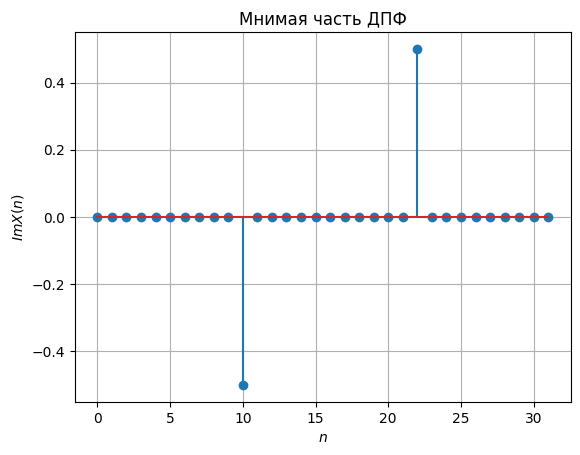

In [29]:
m0 = 10
m1 = 0.85
N = 32

rg = 100

k = np.arange(rg)
m = m0
x_k = np.cos(2*math.pi*m*k / N) + np.sin(2*math.pi*m*k / N)

plt.figure()

plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 

k_range = np.linspace(0,rg, 1000)
x_k_range = np.cos(2*math.pi*m*k_range / N) + np.sin(2*math.pi*m*k_range / N)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')

plt.grid()

# вычислим значения ДПФ на одном периоде
X = np.array([1/N * np.dot(x_k[:N], np.exp(-1j*2*math.pi*k[:N]*n / N)) for n in range(N)])

plt.figure()
plt.stem(np.arange(N), X.real)
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.figure()
plt.stem(np.arange(N), X.imag)
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()

Аналитическое выражения для ДПФ:
$$X(\nu) = \sum \limits_{- ∞}^{∞} x[k] \exp(-j 2 \pi \nu k)$$
(ДПФ является набором отсчетов ДВПФ)

тогда

$$Re X(\nu) = \sum \limits_{- ∞}^{∞} \frac{1}{2} δ \left(\nu - \frac{m}{N} - n \right) + \frac{1}{2} δ \left(\nu + \frac{m}{N} - n \right)$$

$$Im X(\nu) = \sum \limits_{- ∞}^{∞} \frac{1}{2} δ \left(\nu - \frac{m}{N} - n \right) - \frac{1}{2} δ \left(\nu + \frac{m}{N} - n \right)$$

(для m_0)
ДПФ с помощью библиотечных функций:


/tmp/ipykernel_14281/3967984618.py:3: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', 'bo')
/tmp/ipykernel_14281/3967984618.py:10: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', 'bo')


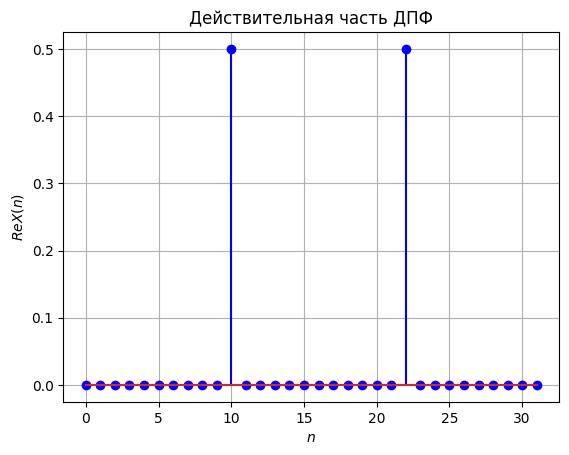

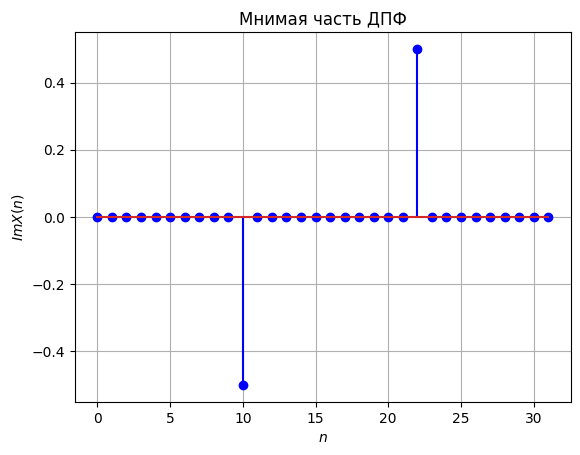

In [30]:
plt.figure()

plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', 'bo')
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.figure()
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', 'bo')
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()

Для m_0 + m_1:

/tmp/ipykernel_14281/1019284131.py:9: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, x_k, 'b', 'bo')
/tmp/ipykernel_14281/1019284131.py:21: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', 'bo')
/tmp/ipykernel_14281/1019284131.py:28: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', 'bo')


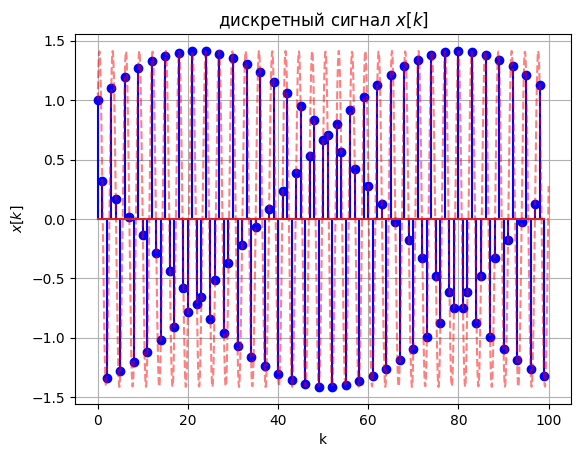

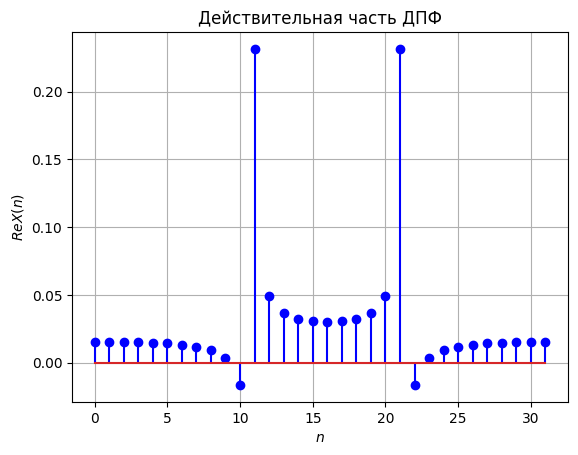

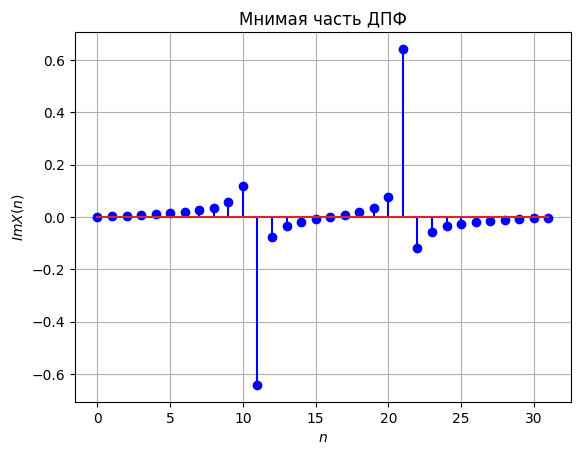

In [31]:
rg = 100

k = np.arange(rg)
m = m0 + m1
x_k = np.cos(2*math.pi*m*k / N) + np.sin(2*math.pi*m*k / N)

plt.figure()

plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 

k_range = np.linspace(0,rg, 1000)
x_k_range = np.cos(2*math.pi*m*k_range / N) + np.sin(2*math.pi*m*k_range / N)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')

plt.grid()

plt.figure()
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', 'bo')
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.figure()
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', 'bo')
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()